<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


# Become familiar with the dataset

In [5]:
boston_df.info()
#By reading the following information, we know there is no NaN data in this data file, and the first column is non-useful.
#So I delete the relevant data to keep data file clean. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.4 KB


In [6]:
boston_df = boston_df.drop(columns = 'Unnamed: 0')
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


# Generate Descriptive Statistics and Visualizations


### The following graphs help us to gain some insights from the data:
1. For the "Median value of owner-occupied homes" provide a boxplot
2. Provide a  bar plot for the Charles river variable
3. Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
4. Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
5. Create a histogram for the pupil to teacher ratio variable

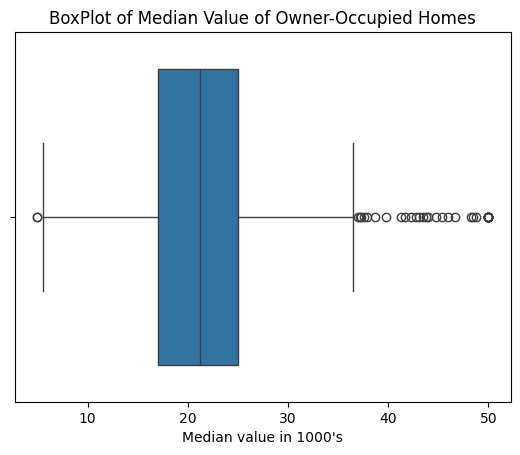

In [7]:
sns.boxplot(x='MEDV', data=boston_df)
plt.title('BoxPlot of Median Value of Owner-Occupied Homes')
plt.xlabel("Median value in 1000's")
plt.show()

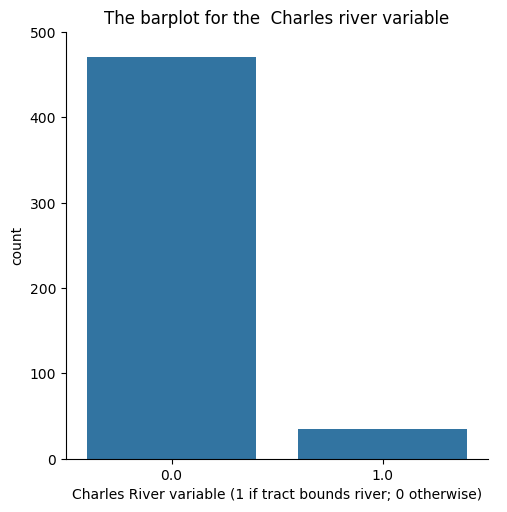

In [8]:
sns.catplot(x='CHAS',kind='count',data=boston_df)
plt.title('The barplot for the  Charles river variable')
plt.xlabel('Charles River variable (1 if tract bounds river; 0 otherwise)')
plt.ylim(0,500)
plt.show()

Based on this bar graph, we know that most of the houses are built around the Charles River.

In [9]:
boston_df.loc[(boston_df['AGE']<= 35),'age_group']= '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE']>= 70),'age_group']= '70 years and older'

In [10]:
group1 = boston_df[boston_df['age_group'] == '35 years and younger']
group2 = boston_df[boston_df['age_group'] == 'between 35 and 70 years']
group3 = boston_df[boston_df['age_group'] == '70 years and older']

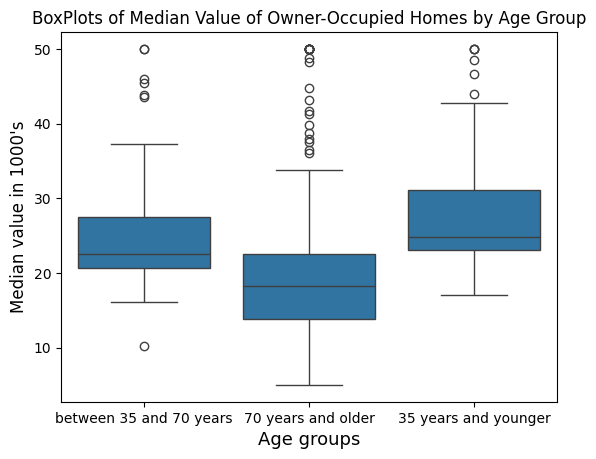

In [11]:
sns.boxplot(x='age_group',y = 'MEDV', data=boston_df)
plt.title('BoxPlots of Median Value of Owner-Occupied Homes by Age Group')
plt.ylabel("Median value in 1000's",fontsize=12)
plt.xlabel('Age groups',fontsize=13)
plt.show()

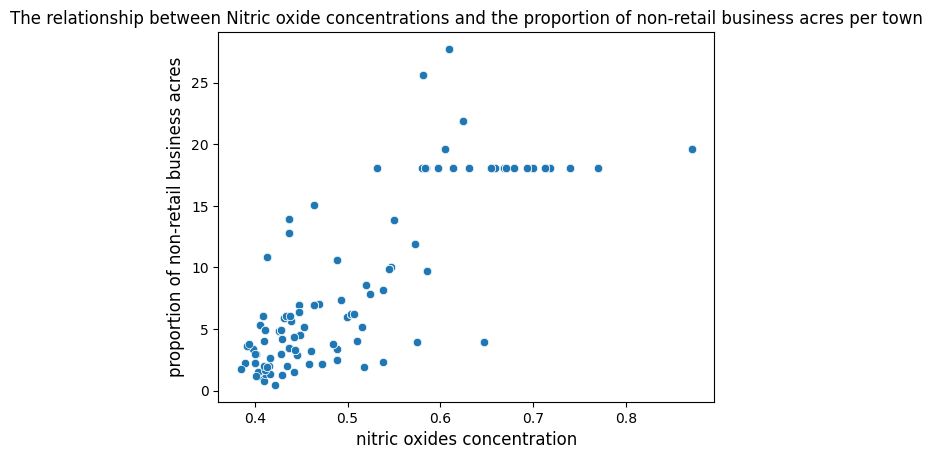

In [12]:
sns.scatterplot(x='NOX',y='INDUS',data=boston_df)
plt.title('The relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town')
plt.xlabel('nitric oxides concentration',fontsize=12)
plt.ylabel('proportion of non-retail business acres',fontsize=12)
plt.show()

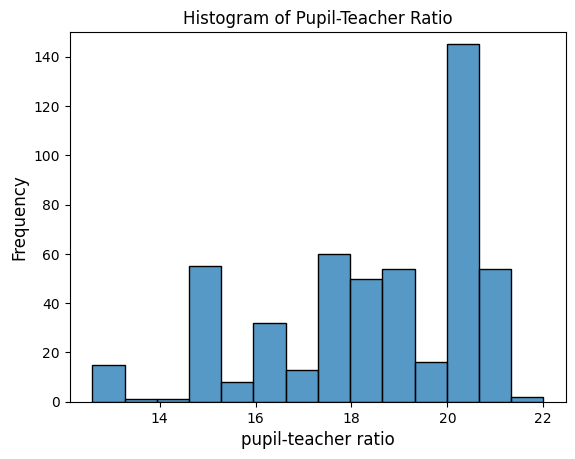

In [13]:
sns.histplot(x='PTRATIO',data=boston_df)
plt.ylim(0,150)
plt.title('Histogram of Pupil-Teacher Ratio')
plt.xlabel('pupil-teacher ratio',fontsize=12)
plt.ylabel('Frequency',fontsize=12)
plt.show()

## Question 1: Is there a significant difference in median value of houses bounded by the Charles river or not?

1. State the hypothesis
   - Null hypothesis: The medians between the 2 samples (bounded / non-bounded) are the same.
     Median (river bounded) = Median (non-bounded)
     
   - Alternative hypothesis: The medians between the 2 samples are different.
     Median (river bounded) != Median (non-bounded)
     
2. Set the alpha level is 0.05
   - p < 0.05 means there is a significant difference between 2 median
   - p > 0.05 means there is no enough evidence to say there is a significant difference between 2 medians.

In [14]:
#Running Levene Test before to ensure the variances of 2 samples
river_bounded = boston_df[boston_df['CHAS'] == 1]['MEDV']
not_river_bounded = boston_df[boston_df['CHAS'] == 0]['MEDV']

scipy.stats.levene(river_bounded,not_river_bounded)

LeveneResult(statistic=4.590342218715871, pvalue=0.03263097600633006)

In [15]:
# 3. Perform test statistics
river_bounded = boston_df[boston_df['CHAS'] == 1]['MEDV']
not_river_bounded = boston_df[boston_df['CHAS'] == 0]['MEDV']

scipy.stats.ttest_ind(river_bounded,not_river_bounded, equal_var = False)

TtestResult(statistic=3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

4. Draw Conclusion
   
   According to the test, the p-value is less than 0.05 meaning that we reject the null hypothesis and there is a significant difference in median value of houses bouned by Charles River.

## Question 2: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? 

1. State the hypothesis
   - null hypothesis: The three groups' median are equal.
   - alternative hypothesis: At least one of the median differ.
2. Set the alpha level = 0.05

In [16]:
#Running Levene Test for equality of variance
scipy.stats.levene(group1['AGE'],group2['AGE'],group3['AGE'],center='median')

#Since the p-value is less than 0.05, the variance are not equal, for the purposes of this exercise, we will move along

LeveneResult(statistic=4.807083842920513, pvalue=0.008550884906283819)

In [17]:
# 3. perform test statistics
f_statistic, p_value = scipy.stats.f_oneway(group1['AGE'], group2['AGE'], group3['AGE'])
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 2162.99425724172, P-Value: 9.005770381051771e-248


4. Conclusion
   
   The p-value is larger than 0.05,  we will reject the null hypothesis as there is significant evidence that at least one of the medians differs.

## Question 3: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? 

1. States the hypothesis
   H0: The Nitric oxide concentration (NOX) is not correlated to the proportion of non-retail business per town.
   H1: The nitric oxide concentration (NOX) is correlated to the proportion of non-retail business per town.
2. Set alpha level = 0.05

In [18]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

4. Conclusion

   The p-value is larger than 0.05; We fail to reject h0, meaning that there is no enough evidence to say the two variables are correlated. 

## Question 4: What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes?

In [22]:
X = sm.add_constant(boston_df['DIS'])
y = boston_df['MEDV']

model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 09 Jul 2024   Prob (F-statistic):           1.21e-08
Time:                        17:34:01   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Conclusion:

The p-value is larger than 0.05, so we fail to reject the null hypothesis as there is no enough evidence of difference in median value of owner-occupied homes based on the weighted distance to the five Boston employment centers.